In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import chi2

In [ ]:

datas = pd.read_csv('studentrecord.csv')
datas

,Name,Gender,10th %,12th %,CGPA,placement_status,Backlogs,core_concepts,coding,stay,meal_intake,social_media_usage,hrs_in_social_media,sleep(hrs),physical_activites,communication,no_of_online_courses,Library_usage,study_hours,Attendance
0,Aparna M,Female,93.1,92.3,9.44,Yes (Placed),No,Beginner,Beginner,Hostel,3,Yes,3.0,Exactly 8,yes,Proficient,4,Below 10,Below 0,Above 90 %
1,M.Sreenandhini,Female,90.0,65,8.70,No (Not Placed),No,Proficient,Proficient,Dayscholar,3,Yes,2.0,Above 8,No,Expert,4,Below 10,Between 1 to 5,Above 90 %
2,Thejaswin,Male,95.0,77,8.40,Yes (Placed),No,Expert,Expert,Hostel,3,Yes,2.0,Below 8,No,Expert,4,Below 10,Below 0,Between 76 to 89
3,Hari,Male,97.4,93.8,8.95,Yes (Placed),No,Beginner,Expert,Hostel,3,Yes,5.0,Above 8,No,Expert,3,Below 10,Between 1 to 5,Between 76 to 89
4,Varshini R,Female,78.0,82,8.86,Yes (Placed),No,Expert,Expert,Dayscholar,3,Yes,5.0,Above 8,No,Expert,7,Between 11 to 20,Between 1 to 5,Between 76 to 89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ajai A,Male,75.0,64,8.30,No (Not Placed),No,Proficient,Beginner,Dayscholar,3,Yes,3.0,Above 8,yes,Beginner,3,Below 10,Between 1 to 5,Above 90 %
81,R.Shreeya,Female,92.0,86.58,7.45,Yes (Placed),No,Beginner,Beginner,Dayscholar,3,Yes,13.0,Exactly 8,yes,Proficient,2,Below 10,Between 1 to 5,Above 90 %
82,Rithik,Male,90.3,76.1,8.05,Yes (Placed),No,Expert,Expert,Hostel,3,Yes,3.0,Below 8,yes,Expert,3,Below 10,Between 1 to 5,Between 76 to 89
83,Nikitha Ramesh,Female,71.8,85.2,63.10,Yes (Placed),No,Beginner,Beginner,Dayscholar,3,Yes,4.0,Above 8,yes,Expert,3,Below 10,Between 1 to 5,Above 90 %


In [ ]:
datas.head()

,Name,Gender,10th %,12th %,CGPA,placement_status,Backlogs,core_concepts,coding,stay,meal_intake,social_media_usage,hrs_in_social_media,sleep(hrs),physical_activites,communication,no_of_online_courses,Library_usage,study_hours,Attendance
0,Aparna M,Female,93.1,92.3,9.44,Yes (Placed),No,Beginner,Beginner,Hostel,3,Yes,3.0,Exactly 8,yes,Proficient,4,Below 10,Below 0,Above 90 %
1,M.Sreenandhini,Female,90.0,65,8.70,No (Not Placed),No,Proficient,Proficient,Dayscholar,3,Yes,2.0,Above 8,No,Expert,4,Below 10,Between 1 to 5,Above 90 %
2,Thejaswin,Male,95.0,77,8.40,Yes (Placed),No,Expert,Expert,Hostel,3,Yes,2.0,Below 8,No,Expert,4,Below 10,Below 0,Between 76 to 89
3,Hari,Male,97.4,93.8,8.95,Yes (Placed),No,Beginner,Expert,Hostel,3,Yes,5.0,Above 8,No,Expert,3,Below 10,Between 1 to 5,Between 76 to 89
4,Varshini R,Female,78.0,82,8.86,Yes (Placed),No,Expert,Expert,Dayscholar,3,Yes,5.0,Above 8,No,Expert,7,Between 11 to 20,Between 1 to 5,Between 76 to 89


In [ ]:
datas.shape

(85, 20)

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  85 non-null     object 
 1   Gender                85 non-null     object 
 2   10th %                85 non-null     float64
 3   12th %                85 non-null     object 
 4   CGPA                  85 non-null     float64
 5   placement_status      85 non-null     object 
 6   Backlogs              85 non-null     object 
 7   core_concepts         85 non-null     object 
 8   coding                85 non-null     object 
 9   stay                  85 non-null     object 
 10  meal_intake           85 non-null     object 
 11  social_media_usage    85 non-null     object 
 12  hrs_in_social_media   82 non-null     float64
 13  sleep(hrs)            85 non-null     object 
 14  physical_activites    85 non-null     object 
 15  communication         85 

In [ ]:
datas.columns

Index(['Name', 'Gender', '10th %', '12th %', 'CGPA', 'placement_status',
       'Backlogs', 'core_concepts', 'coding', 'stay', 'meal_intake',
       'social_media_usage', 'hrs_in_social_media', 'sleep(hrs)',
       'physical_activites', 'communication', 'no_of_online_courses',
       'Library_usage', 'study_hours', 'Attendance'],
      dtype='object')

In [ ]:
datas.nunique()

Name                    85
Gender                   2
10th %                  40
12th %                  63
CGPA                    58
placement_status         2
Backlogs                 2
core_concepts            3
coding                   3
stay                     2
meal_intake              4
social_media_usage       2
hrs_in_social_media     12
sleep(hrs)               3
physical_activites       2
communication            3
no_of_online_courses    17
Library_usage            3
study_hours              3
Attendance               3
dtype: int64

In [ ]:
datas.describe()

,10th %,CGPA,hrs_in_social_media,no_of_online_courses
count,85.000000,85.000000,82.000000,85.000000
mean,99.374118,10.964235,3.676829,5.588235
std,54.314918,12.654189,3.125336,5.278650
min,0.000000,0.000000,0.000000,0.000000
25%,89.000000,8.270000,2.000000,3.000000
50%,96.000000,8.790000,3.000000,4.000000
75%,98.200000,9.210000,4.750000,6.000000
max,492.000000,88.000000,24.000000,35.000000


In [ ]:
datas.dtypes

Name                     object
Gender                   object
10th %                  float64
12th %                   object
CGPA                    float64
placement_status         object
Backlogs                 object
core_concepts            object
coding                   object
stay                     object
meal_intake              object
social_media_usage       object
hrs_in_social_media     float64
sleep(hrs)               object
physical_activites       object
communication            object
no_of_online_courses      int64
Library_usage            object
study_hours              object
Attendance               object
dtype: object

In [ ]:
datas.isnull().sum()

Name                    0
Gender                  0
10th %                  0
12th %                  0
CGPA                    0
placement_status        0
Backlogs                0
core_concepts           0
coding                  0
stay                    0
meal_intake             0
social_media_usage      0
hrs_in_social_media     3
sleep(hrs)              0
physical_activites      0
communication           0
no_of_online_courses    0
Library_usage           0
study_hours             0
Attendance              0
dtype: int64

In [ ]:

datas.fillna(0)


,Name,Gender,10th %,12th %,CGPA,placement_status,Backlogs,core_concepts,coding,stay,meal_intake,social_media_usage,hrs_in_social_media,sleep(hrs),physical_activites,communication,no_of_online_courses,Library_usage,study_hours,Attendance
0,Aparna M,1,93.1,92.3,9.44,1,0,1,1,0,3,1,3.0,2,1,3,4,1,0.0,3
1,M.Sreenandhini,1,90.0,65,8.70,0,0,3,3,1,3,1,2.0,3,0,2,4,1,2.0,3
2,Thejaswin,0,95.0,77,8.40,1,0,2,2,0,3,1,2.0,1,0,2,4,1,0.0,2
3,Hari,0,97.4,93.8,8.95,1,0,1,2,0,3,1,5.0,3,0,2,3,1,2.0,2
4,Varshini R,1,78.0,82,8.86,1,0,2,2,1,3,1,5.0,3,0,2,7,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Ajai A,0,75.0,64,8.30,0,0,3,1,1,3,1,3.0,3,1,1,3,1,2.0,3
81,R.Shreeya,1,92.0,86.58,7.45,1,0,1,1,1,3,1,13.0,2,1,3,2,1,2.0,3
82,Rithik,0,90.3,76.1,8.05,1,0,2,2,0,3,1,3.0,1,1,2,3,1,2.0,2
83,Nikitha Ramesh,1,71.8,85.2,63.10,1,0,1,1,1,3,1,4.0,3,1,2,3,1,2.0,3


In [ ]:
datas['Gender'] = datas['Gender'].apply({'Male':0, 'Female':1}.get)
datas['Backlogs'] = datas['Backlogs'].apply({'No':0, 'Yes':1}.get)
datas['placement_status'] = datas['placement_status'].apply({'No (Not Placed)':0, 'Yes (Placed)':1}.get)
datas['social_media_usage'] = datas['social_media_usage'].apply({'No':0, 'Yes':1}.get)
datas['physical_activites'] = datas['physical_activites'].apply({'No':0, 'yes':1}.get)
datas['core_concepts'] = datas['core_concepts'].apply({'Beginner':1, 'Expert':2,'Proficient':3}.get)
datas['coding'] = datas['coding'].apply({'Beginner':1, 'Expert':2,'Proficient':3}.get)
datas['communication'] = datas['communication'].apply({'Beginner':1, 'Expert':2,'Proficient':3}.get)
datas['stay'] = datas['stay'].apply({'Hostel':0, 'Dayscholar':1}.get)
datas['sleep(hrs)'] = datas['sleep(hrs)'].apply({'Below 8':1, 'Exactly 8':2, 'Above 8':3}.get)
datas['Library_usage'] = datas['Library_usage'].apply({'Below 10':1, 'Between 11 to 20':2, 'Above 21':3}.get)
datas['Attendance'] = datas['Attendance'].apply({'Below 75':1, 'Between 76 to 89':2, 'Above 90 %':3}.get)
datas['study_hours']=datas['study_hours'].apply({ '0':1, 'Between 1 to 5':2, 'Above 5':3}.get)

In [ ]:
datas.head()

,Name,Gender,10th %,12th %,CGPA,placement_status,Backlogs,core_concepts,coding,stay,meal_intake,social_media_usage,hrs_in_social_media,sleep(hrs),physical_activites,communication,no_of_online_courses,Library_usage,study_hours,Attendance
0,Aparna M,1,93.1,92.3,9.44,1,0,1,1,0,3,1,3.0,2,1,3,4,1,NaN,3
1,M.Sreenandhini,1,90.0,65,8.70,0,0,3,3,1,3,1,2.0,3,0,2,4,1,2.0,3
2,Thejaswin,0,95.0,77,8.40,1,0,2,2,0,3,1,2.0,1,0,2,4,1,NaN,2
3,Hari,0,97.4,93.8,8.95,1,0,1,2,0,3,1,5.0,3,0,2,3,1,2.0,2
4,Varshini R,1,78.0,82,8.86,1,0,2,2,1,3,1,5.0,3,0,2,7,2,2.0,2


,Name,Gender,10th %,12th %,CGPA,placement_status,Backlogs,core_concepts,coding,stay,meal_intake,social_media_usage,hrs_in_social_media,sleep(hrs),physical_activites,communication,no_of_online_courses,Library_usage,study_hours,Attendance
0,Aparna M,1,93.1,92.3,9.44,1,0,1,1,0,3,1,3.0,2,1,3,4,1,1,3
1,M.Sreenandhini,1,90.0,65.0,8.70,0,0,3,3,1,3,1,2.0,3,0,2,4,1,2,3
2,Thejaswin,0,95.0,77.0,8.40,1,0,2,2,0,3,1,2.0,1,0,2,4,1,1,2
3,Hari,0,97.4,93.8,8.95,1,0,1,2,0,3,1,5.0,3,0,2,3,1,2,2
4,Varshini R,1,78.0,82.0,8.86,1,0,2,2,1,3,1,5.0,3,0,2,7,2,2,2


# HEATMAP


<AxesSubplot:>

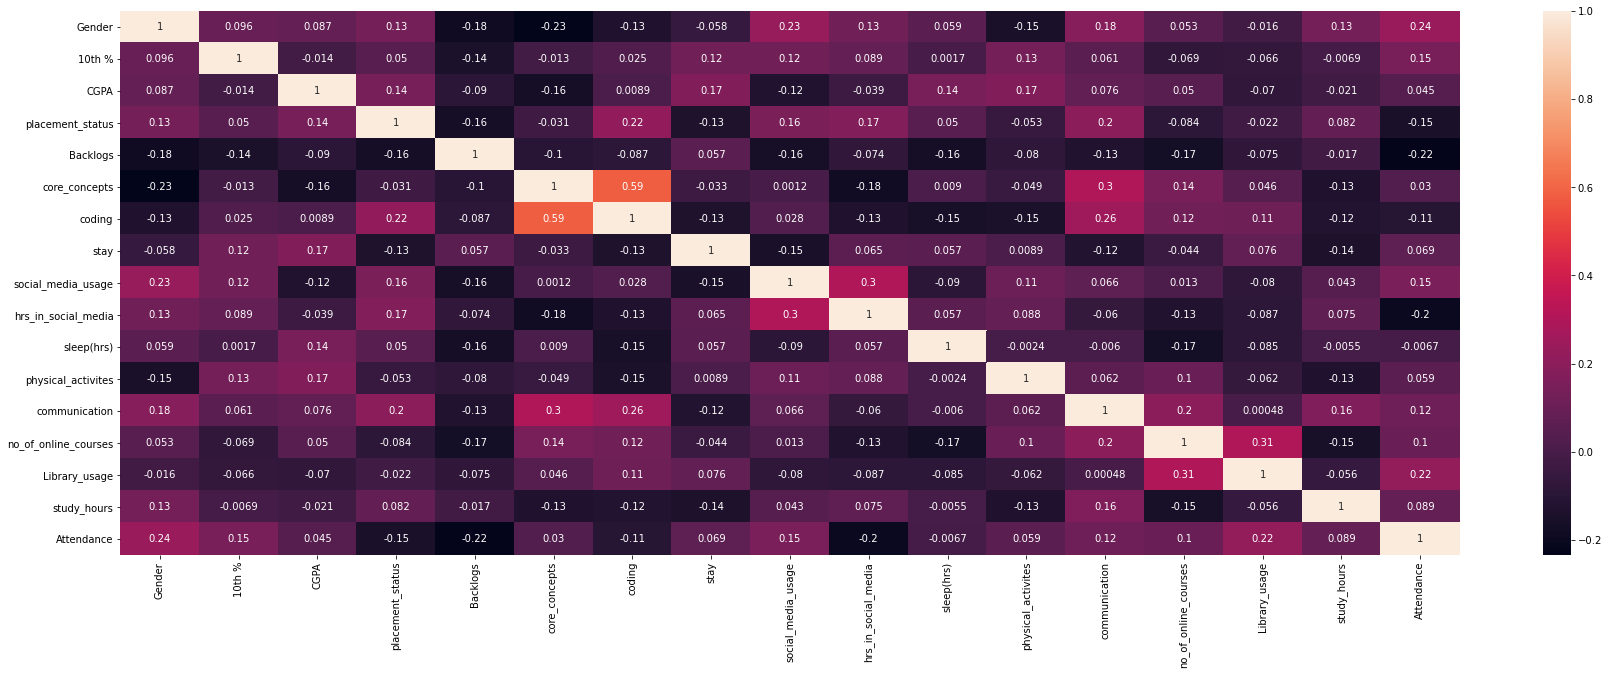

In [ ]:
heat =datas.corr()
plt.figure(figsize=(30,10))
sns.heatmap(heat, annot=True)

<AxesSubplot:xlabel='placement_status', ylabel='count'>

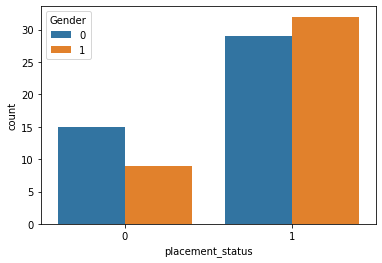

In [ ]:
sns.countplot(x ='placement_status', hue="Gender" , data = datas) 

In [ ]:
sns.countplot(datas['placement_status']) 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Backlogs', ylabel='count'>

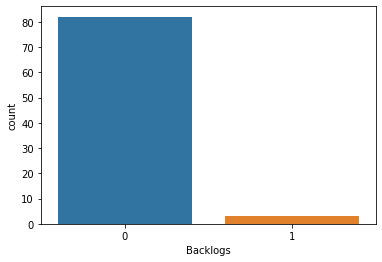

In [ ]:
sns.countplot(datas['Backlogs']) 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='social_media_usage', ylabel='count'>

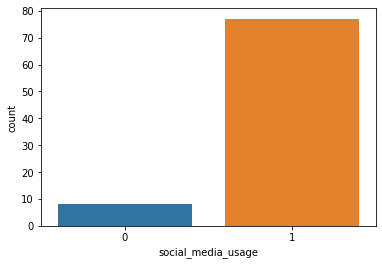

In [ ]:
sns.countplot(datas['social_media_usage'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stay', ylabel='count'>

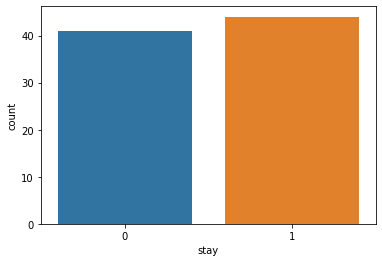

In [ ]:
sns.countplot(datas['stay'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='core_concepts', ylabel='count'>

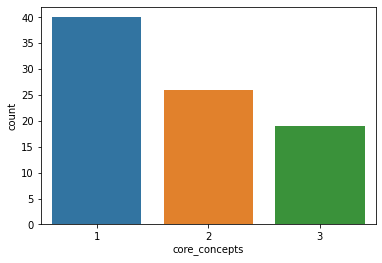

In [ ]:
sns.countplot(datas['core_concepts'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coding', ylabel='count'>

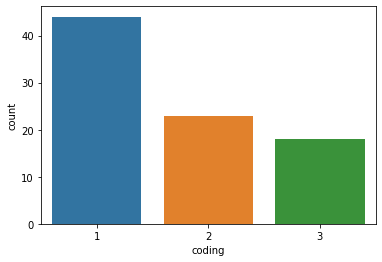

In [ ]:
sns.countplot(datas['coding'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sleep(hrs)', ylabel='count'>

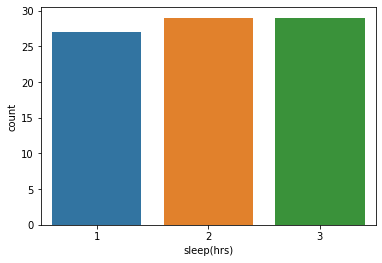

In [ ]:
sns.countplot(datas['sleep(hrs)'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='communication', ylabel='count'>

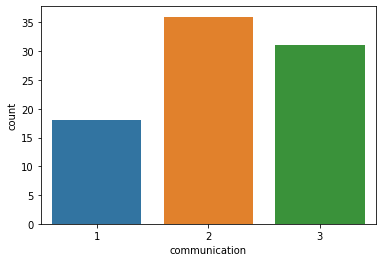

In [ ]:
sns.countplot(datas['communication'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Library_usage', ylabel='count'>

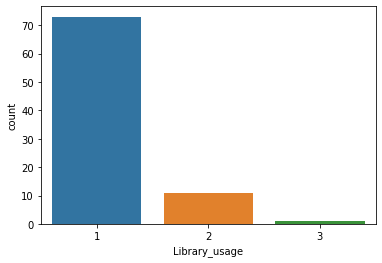

In [ ]:
sns.countplot(datas['Library_usage'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attendance', ylabel='count'>

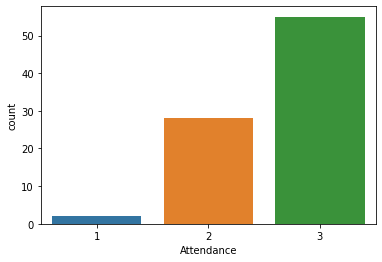

In [ ]:
sns.countplot(datas['Attendance'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hrs_in_social_media', ylabel='count'>

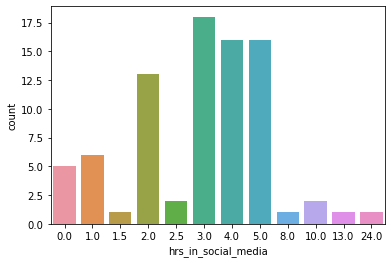

In [ ]:
sns.countplot(datas['hrs_in_social_media'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_online_courses', ylabel='count'>

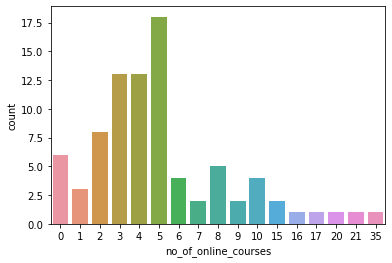

In [ ]:
sns.countplot(datas['no_of_online_courses'])